In [1]:
import numpy as np
import pandas as pd

%run settings/plt_settings.ipynb
%run settings/db_connect.ipynb

## ucitavamo rezultate za kw

In [2]:
%run parsers/keywords_parser.ipynb
kw_list = parse_keywlist('data/IN/keywlist.txt')
kw_name_dict = {rec.get_name(): rec for rec in kw_list}

In [3]:
top20dis2007 = pd.read_csv('data/IN/top20dis2007.csv')
top20ord2007 = pd.read_csv('data/IN/top20ord2007.csv')

In [16]:
Fj_kw_stat = pd.read_csv('data/OUT/FJ_kw_stat.csv', index_col='kw')
Fj_kw_valid = (Fj_kw_stat.query(' n>=20')
                         .sort_values('z', ascending=False))

In [11]:
Fj_kw_valid.head()

,name,n,avg_len,avg_dis,z,p
kw,,,,,,
KW-0238,DNA-binding,6518,546.531912,0.871126,46.904973,1.0
KW-0217,Developmental protein,3897,655.208622,0.859379,31.096980,1.0
KW-0010,Activator,2574,600.510101,0.878788,28.115824,1.0
KW-0678,Repressor,1988,589.294769,0.852113,22.628029,1.0
KW-0694,RNA-binding,2728,575.764296,0.763563,16.617519,1.0


## ucitavamo rezultate za GO

In [28]:
Fj_go_stat = pd.read_csv('data/OUT/FJ_go_stat.csv', index_col='go')

In [260]:
Fj_go_valid = (Fj_go_stat.query('  n>=20')
                         .sort_values('z', ascending=False))


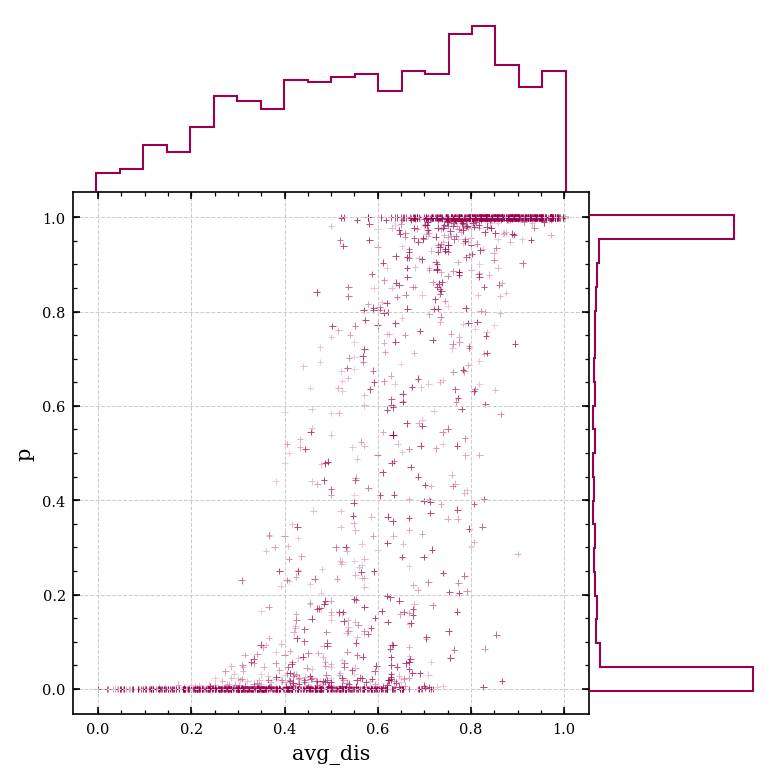

In [229]:
fig = plt.figure(figsize=(5, 5)) 
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1,3], wspace=0, hspace=0) 
ax_top = plt.subplot(gs[0])
ax_main = plt.subplot(gs[2])
ax_right = plt.subplot(gs[3])

for ax in (ax_top, ax_right):
    ax.set_axis_off()

df = Fj_go_valid
xs = df.avg_dis
ys = df.p

xs_count = df.n
xs_color = [(0.6,0,0.3, max(min(n/100,0.7),0.2) ) for n in xs_count]

ax_main.scatter( xs,  ys, marker='+', color=xs_color, linewidth=0.5, s=10)

ax_top.hist(xs, bins=20, color=(0.6, 0, 0.3), histtype='step')
ax_right.hist(ys, bins=20, orientation='horizontal', color=(0.6, 0, 0.3), histtype='step')

ax_main.set_xticks(np.arange(1.01, step=0.05), minor=True)
ax_main.set_yticks(np.arange(1.01, step=0.05), minor=True)

ax_main.tick_params(top=True, right=True, which='both', direction='in')


ax_main.set_xlabel("avg_dis")
ax_main.set_ylabel("p")

plt.tight_layout(pad=0)
#plt.savefig('plots/avg_dis2p.pdf', dpi=300)

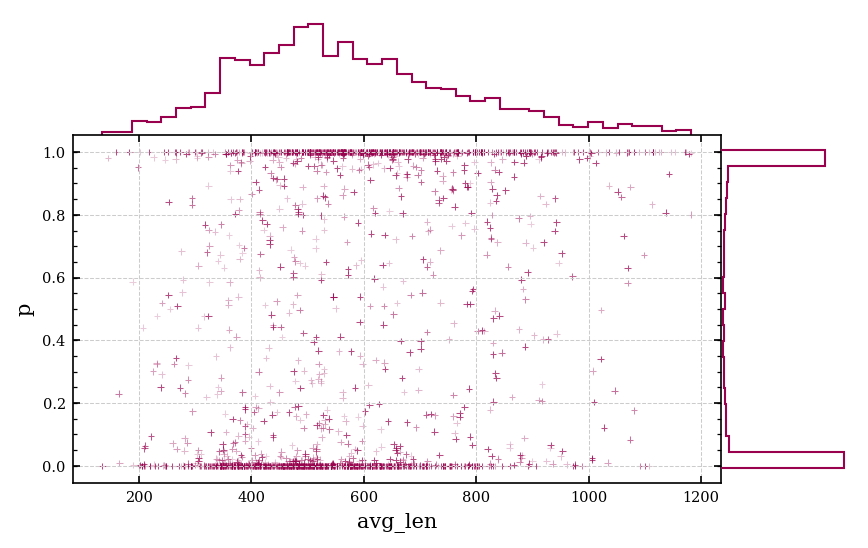

In [488]:
fig = plt.figure() 
gs = gridspec.GridSpec(2, 2, width_ratios=[5, 1], height_ratios=[1,3], wspace=0, hspace=0) 
ax_top = plt.subplot(gs[0])
ax_main = plt.subplot(gs[2])
ax_right = plt.subplot(gs[3])

for ax in (ax_top, ax_right):
    ax.set_axis_off()

df = Fj_go_valid.query('avg_len<1200')
xs = df.avg_len
ys = df.p

xs_count = df.n
xs_color = [(0.6,0,0.3, max(min(n/100,0.7),0.2) ) for n in xs_count]

ax_main.scatter( xs,  ys, marker='+', color=xs_color, linewidth=0.5, s=10)

ax_top.hist(xs, bins=40, color=(0.6, 0, 0.3), histtype='step')
ax_right.hist(ys, bins=20, orientation='horizontal', color=(0.6, 0, 0.3), histtype='step')

ax_main.set_yticks(np.arange(1.01, step=0.05), minor=True)

ax_main.tick_params(top=True, right=True, which='both', direction='in')


ax_main.set_xlabel("avg_len")
ax_main.set_ylabel("p")

plt.tight_layout(pad=0)
#plt.savefig('plots/avg_len2p.pdf', dpi=300)

In [464]:
coefs = poly.polyfit(xs, ys, 1)
coefs

array([ 2.81647191,  0.00681013])

Koeficijent korelacije: 0.94


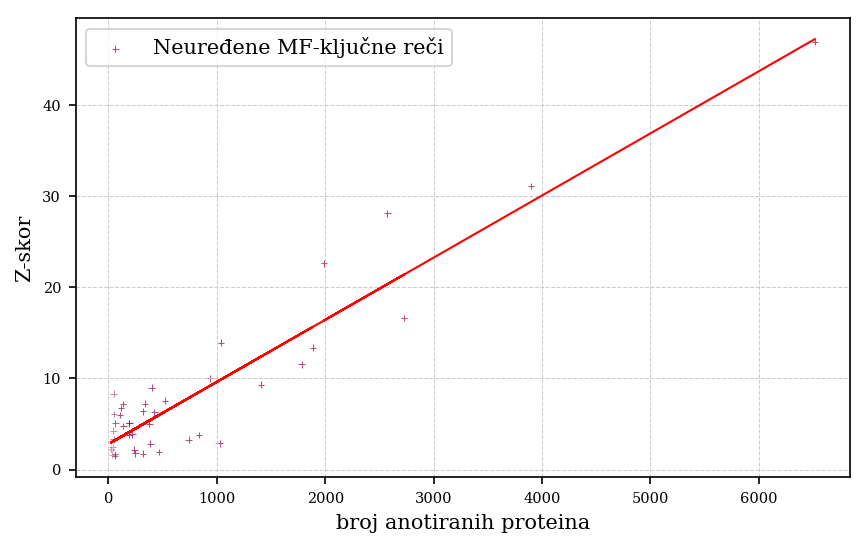

In [503]:
fig, ax = plt.subplots()

df = Fj_kw_valid.query('p>0.95')
xs = df.n
ys = df.z

xs_count = df.n
xs_color = [(0.6,0,0.3, max(min(n/100,0.7),0.2) ) for n in xs_count]
ax.scatter( xs,  ys, marker='+', color=xs_color, linewidth=0.5, s=10, label='Neuređene MF-ključne reči')


import numpy.polynomial.polynomial as poly
fit = np.polyfit(xs,ys,1)
fit_fn = np.poly1d(fit) 
ax.plot(xs, fit_fn(xs), 'r', linewidth=1)
print("Koeficijent korelacije: %0.2f"% np.corrcoef(xs, ys)[1,0])


ax.set_xlabel("broj anotiranih proteina")
ax.set_ylabel("Z-skor")
ax.legend()
fig.tight_layout(pad=0)
plt.savefig('plots/Z_n_corr_kw.pdf', dpi=300)

Koeficijent korelacije: 0.61


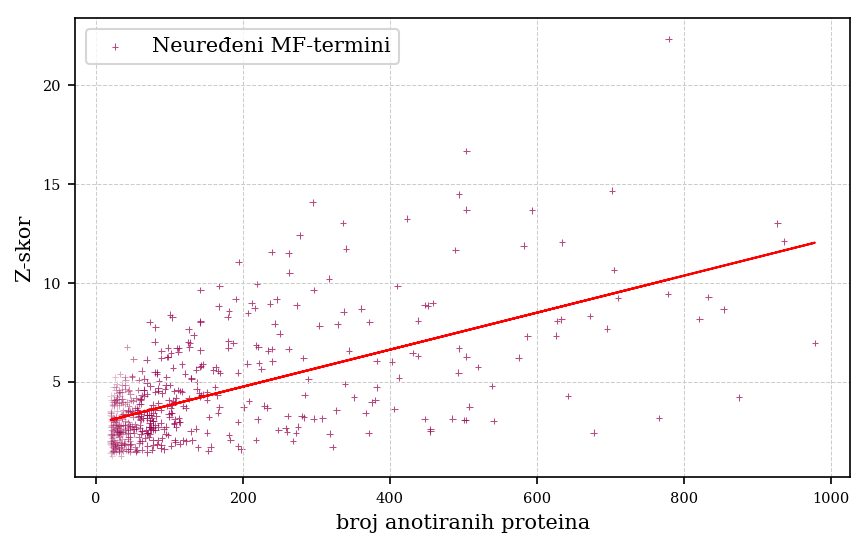

In [508]:
fig, ax = plt.subplots()

df = Fj_go_valid.query('p>0.95 and n<1000')
xs = df.n
ys = df.z

xs_count = df.n
xs_color = [(0.6,0,0.3, max(min(n/100,0.7),0.2) ) for n in xs_count]
ax.scatter( xs,  ys, marker='+', color=xs_color, linewidth=0.5, s=10, label='Neuređeni MF-termini')


import numpy.polynomial.polynomial as poly
fit = np.polyfit(xs,ys,1)
fit_fn = np.poly1d(fit) 
ax.plot(xs, fit_fn(xs), 'r', linewidth=1)
print("Koeficijent korelacije: %0.2f"% np.corrcoef(xs, ys)[1,0])


ax.set_xlabel("broj anotiranih proteina")
ax.set_ylabel("Z-skor")
ax.legend()
fig.tight_layout(pad=0)
plt.savefig('plots/Z_n_corr_go.pdf', dpi=300)

# -----------------------------------------------------------------------------------------------

In [220]:
dis40 = sql(r"""select * from valid_proteins where len >= 40""")
dis40.head()

,len,dis40,dis40_random,dis40_uniform,dis_smart,dis_smart_random
ac,,,,,,
A2AC93,623,True,False,False,True,False
A2AD83,703,True,True,False,True,True
A2AGH6,2190,True,True,False,True,True
A2AJ88,1352,True,True,False,True,True
A2AJK6,2986,True,True,False,True,True


In [237]:
def generate_PL(df, column):
    from functools import lru_cache
    
    df = pd.DataFrame(df[['len', column]])
   
    @lru_cache(maxsize=None)
    def _PL(L):
        eps = round(0.1*L)
        return df[ (df.len >= L-eps) & (df.len <= L+eps) ].mean()[column]
        
    _PL.df = df
    _PL.raw = df.groupby('len').mean()  # da bi kasnije mogao da se referisem na njega
    
    return _PL
  
PL = generate_PL(dis40, 'dis40')
PL_random = generate_PL(dis40, 'dis40_random')
PL_uniform = generate_PL(dis40, 'dis40_uniform')
PL_smart = generate_PL(dis40, 'dis_smart')
PL_smart_random = generate_PL(dis40, 'dis_smart_random')

In [242]:
Fj_kw_raw = sql(r"""
select kw, name
     , count(kw) n
     , avg(len) avg_len
     , avg(dis40::int) avg_dis
     , array_agg(len) length_list
     
from valid_proteins
    join prot2kw on ac=prot
    join keywords on keywords.ac=prot2kw.kw

where true
  and category = 'KW-9992' -- Molecular function
  and len >=40

group by (kw, name)
""")
Fj_kw_raw.head()

,name,n,avg_len,avg_dis,length_list
kw,,,,,
KW-0008,Acetylcholine receptor inhibiting toxin,12,70.750000,0.250000,"[109, 69, 64, 60, 58, 111, 62, 69, 64, 64, 60,..."
KW-0009,Actin-binding,837,974.918757,0.768220,"[730, 1538, 492, 1141, 490, 1141, 821, 1315, 1..."
KW-0010,Activator,2574,600.510101,0.878788,"[238, 187, 532, 201, 775, 345, 376, 2581, 1310..."
KW-0012,Acyltransferase,867,531.583622,0.422145,"[1189, 381, 484, 512, 184, 445, 323, 168, 170,..."
KW-0022,Alpha-amylase inhibitor,3,166.333333,0.000000,"[146, 153, 200]"


In [243]:
%load_ext cython

In [244]:
%%cython -f
from libc.stdlib cimport rand, srand, RAND_MAX

srand(0);
  
cdef float random1():
    return rand()/float(RAND_MAX)

def calcYj(PL_list):
    cdef int i = 0
    cdef float l
    for PL_instance in PL_list:
        if random1() < PL_instance:
            i+=1
    return i/len(PL_list)

In [361]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

cNorm  = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.get_cmap('viridis') )

    
def encode_color(rgb_color):
    cs = rgb_color[:3]
    cs = [hex(int(c*256))[2:].upper() for c in cs]
    cs = [ c if len(c)==2 else "0"+c for c in cs]
    return "#"+"".join(cs)

def get_color(x):
    return encode_color( scalarMap.to_rgba(x) )

get_color(1), get_color(1)

('#FEE724', '#FEE724')

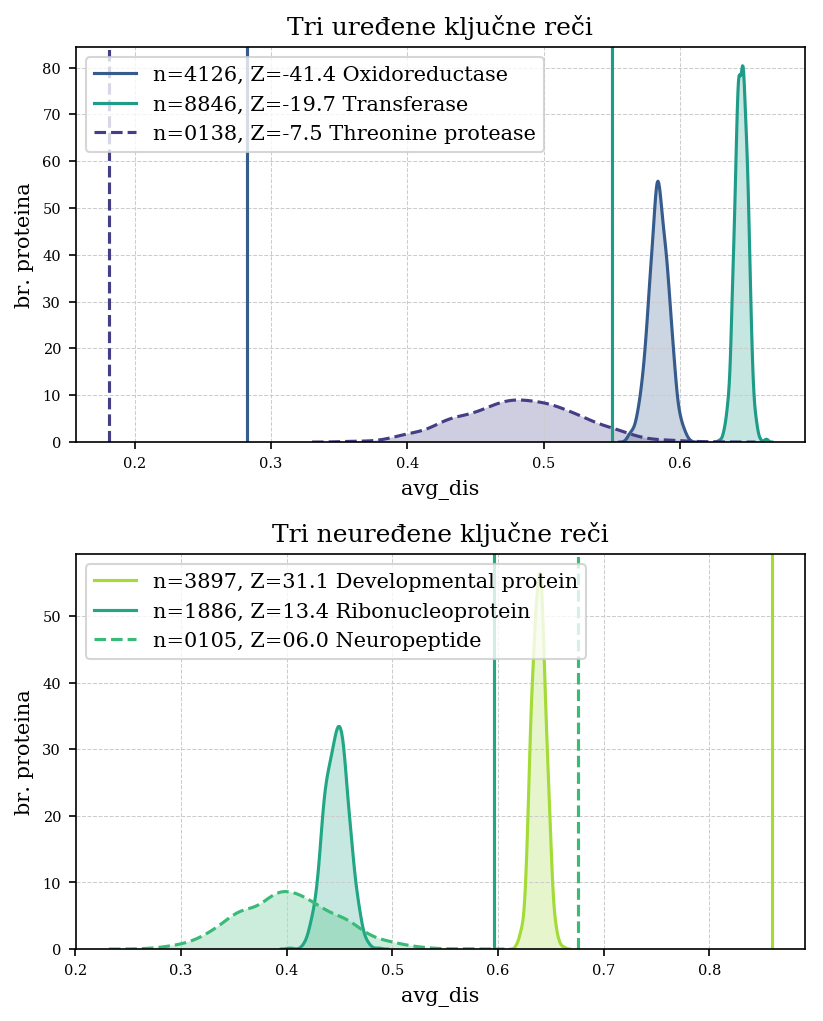

In [412]:
def get_Yj(name, ax, linestyle='-'):
    kw = Fj_kw_raw.query(f""" name=='{name}' """).iloc[0]        
    PL_list = [ PL(l) for l in kw['length_list']]
    Yj_realisations = np.array( [calcYj(PL_list) for _ in range(1000)] )
    
    stat = Fj_kw_valid.query(f""" name=='{name}' """).iloc[0]
    
    label = 'n=%04d, Z=%04.1f %s' % (stat.n, stat.z , name)

    ax.axvline(stat.avg_dis, color=get_color(stat.avg_dis), linestyle=linestyle)
    sns.kdeplot(Yj_realisations, shade=True, ax=ax, color=get_color(stat.avg_dis), linestyle=linestyle, label=label)
    
    ax.set_xlabel("avg_dis")
    ax.set_ylabel("br. proteina")



f, (ax1, ax2) = plt.subplots(2, 1)  
f.set_figheight(f.get_figheight()*2)

ax1.set_title("Tri uređene ključne reči")
get_Yj("Oxidoreductase", ax1, ) 
get_Yj("Transferase", ax1, ) 
get_Yj("Threonine protease", ax1, linestyle='--') 


ax2.set_title("Tri neuređene ključne reči")
get_Yj("Developmental protein", ax2, ) 
get_Yj("Ribonucleoprotein", ax2, ) 
get_Yj("Neuropeptide", ax2, linestyle='--') 


f.tight_layout()
f.savefig('plots/Yj.pdf', dpi=300)